In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 608.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.3/381.3 kB 23.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully un

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import BatchNormalization, Input, Dense
from IPython.display import Image, display
import matplotlib.pyplot as plt
import json


# Dataset


In [ ]:
url_resep = 'https://storage.googleapis.com/model-ml-nutrifit/dataset-raw/resep_makanan%20-%20recipes%20(1).csv'
df_resep = pd.read_csv(url_resep)

url_train = 'https://storage.googleapis.com/model-ml-nutrifit/dataset-raw/TRAIN%20-%20TRAIN.csv'
df_train = pd.read_csv(url_train)

# Pre-Processing

In [ ]:
df_resep.head()

,nama_makanan,kalori,bahan1,jumlah1,bahan2,jumlah2,bahan3,jumlah3,bahan4,jumlah4,...,jumlah14,bahan15,jumlah15,cara_masak,image,porsi,protein_per_porsi,karbohidrat_per_porsi,jenis,cluster
0,overnight oat,380.0,oatmeal,50 gram,susu kedelai,200 ml,strawberry,2 buah,chia seed,secukupnya,...,NaN,NaN,NaN,1. Tuang oatmeal ke wadah kaca atau kotak maka...,https://img-global.cpcdn.com/recipes/321becdb0...,1,16.50,57.54,pokok,0
1,telur super sehat,282.0,telur,3 butir,wortel,1 buah,daun bawang,3 batang,garam,secukupnya,...,NaN,NaN,NaN,1. Aduk semua bahan jadi satu. 2. Siapkan waja...,https://img-global.cpcdn.com/recipes/1503c362b...,1,19.08,10.09,lauk,3
2,sup rumput laut,130.0,pasta tauco jepang,1 sdm,kaldu ikan,1 sdt,tofu,1 bungkus,daun bawang,1 batang,...,NaN,NaN,NaN,"1.Siapkan mangkuk, rendam rumput laut kering d...",https://img-global.cpcdn.com/recipes/ba94ecdb6...,1,10.50,5.83,sayuran,2
3,sayur bayam kecambah,50.0,bayam,1/2 ikat,kecambah,secukupnya,bawang merah,2 siung,bawang putih,2 siung,...,NaN,NaN,NaN,"1. tumis bawang merah, bawang putih, dan cabai...",https://img-global.cpcdn.com/recipes/53b582ddb...,1,5.60,8.36,sayuran,2
4,tumis terung goreng telur,278.0,terung,1 buah,telur,3 butir,kecap asin,3 sdm,cabai,3 biji,...,NaN,NaN,NaN,"1. Iris tipis terung, goreng dengan minyak sec...",https://img-global.cpcdn.com/recipes/76e3b86e0...,1,22.90,18.00,sayuran,3


In [ ]:
df_train.head()

,Gender,Height,Weight,Age,Activity,Target,BMR,BMR X ACT,DEFISIT,KEBUTUHAN,Cluster
0,1,174,96,43,1.375,-4,1965.389,2702.409875,-2200,502.409875,2
1,1,189,87,35,1.200,-2,1962.217,2354.660400,-1100,1254.660400,0
2,0,185,110,24,1.200,-4,1933.973,2320.767600,-2200,120.767600,2
3,0,195,104,19,1.375,-4,1931.121,2655.291375,-2200,455.291375,2
4,1,149,67,37,1.900,-4,1490.963,2832.829700,-2200,632.829700,3


# Model

In [ ]:
# call back
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs["accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

X = df_train[['Weight', 'Height', 'Age', 'Gender', 'Activity', 'Target']].values
y = df_train['Cluster'].values


encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

num_classes = y_encoded.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(6,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Split data untuk training dan validation
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

#early stopping
my_callback = MyThresholdCallback(threshold=0.94)

history = model.fit(X_train, y_train, epochs=300, batch_size=32,
                    validation_data=(X_val, y_val), callbacks=[my_callback])

history_data = history.history
model.save('my_model.h5')

Epoch 1/300
12/12 [==============================] - 1s 24ms/step - loss: 1.8482 - accuracy: 0.2514 - val_loss: 7.0018 - val_accuracy: 0.2105
Epoch 2/300
12/12 [==============================] - 0s 6ms/step - loss: 1.5917 - accuracy: 0.3220 - val_loss: 4.2400 - val_accuracy: 0.2105
Epoch 3/300
12/12 [==============================] - 0s 6ms/step - loss: 1.5379 - accuracy: 0.3192 - val_loss: 3.1343 - val_accuracy: 0.2105
Epoch 4/300
12/12 [==============================] - 0s 6ms/step - loss: 1.5045 - accuracy: 0.3559 - val_loss: 2.8196 - val_accuracy: 0.2105
Epoch 5/300
12/12 [==============================] - 0s 6ms/step - loss: 1.4645 - accuracy: 0.3503 - val_loss: 2.3522 - val_accuracy: 0.2105
Epoch 6/300
12/12 [==============================] - 0s 6ms/step - loss: 1.4824 - accuracy: 0.3503 - val_loss: 1.9655 - val_accuracy: 0.2039
Epoch 7/300
12/12 [==============================] - 0s 6ms/step - loss: 1.4619 - accuracy: 0.3616 - val_loss: 1.7599 - val_accuracy: 0.2105
Epoch 8/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


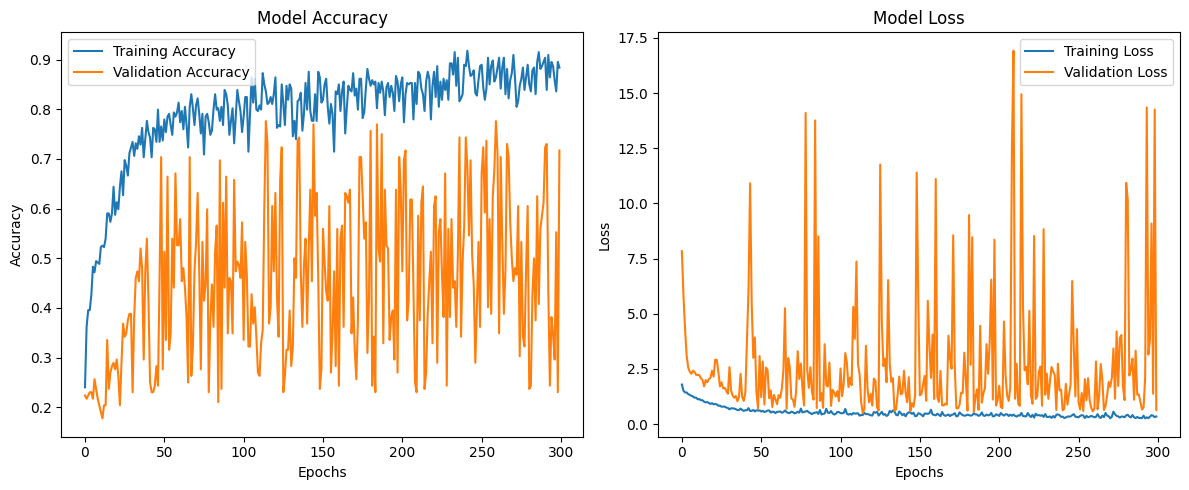

In [ ]:
# Plot grafik accuracy dan loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Prediction & cara penggunaan


Input User Data

In [ ]:
bb = float(input("Masukkan berat badan (kg): "))
tinggi_badan = float(input("Masukkan tinggi badan (cm): "))
umur = int(input("Masukkan umur (tahun): "))
gender = int(input("Masukkan gender (0 untuk perempuan, 1 untuk laki-laki): "))
tingkat_aktivitas = float(input("Masukkan tingkat aktivitas (contoh: 1.375 untuk aktif ringan): "))
target_bb = float(input("Masukkan target penurunan berat badan (misalnya: -4 untuk turun 4 kg): "))

new_user_data = np.array([[bb, tinggi_badan, umur, gender, tingkat_aktivitas, target_bb]])

print("Data pengguna yang dimasukkan:", new_user_data)


Masukkan berat badan (kg): 80
Masukkan tinggi badan (cm): 178
Masukkan umur (tahun): 20
Masukkan gender (0 untuk perempuan, 1 untuk laki-laki): 1
Masukkan tingkat aktivitas (contoh: 1.375 untuk aktif ringan): 1.2
Masukkan target penurunan berat badan (misalnya: -4 untuk turun 4 kg): -1
Data pengguna yang dimasukkan: [[ 80.  178.   20.    1.    1.2  -1. ]]


Pakai model untuk memprediksi user masuk ke cluster berapa

In [ ]:
predicted_cluster = model.predict(new_user_data)

# Ambil cluster
predicted_cluster = np.argmax(predicted_cluster, axis=1)
print("Cluster yang diprediksi:", predicted_cluster[0])

1/1 [==============================] - 0s 24ms/step
Cluster yang diprediksi: 1


membagi resep untuk pagi siang dan sore

In [ ]:
cluster_user = predicted_cluster[0]

# Filter dataset resep berdasarkan cluster_user
filtered_resep = df_resep[df_resep['cluster'] == cluster_user]

filtered_resep = filtered_resep.sample(frac=1, random_state=42).reset_index(drop=True)

# Ambil 3 resep untuk masing-masing waktu makan
resep_pagi = filtered_resep.head(3)  # Resep pertama untuk pagi
resep_siang = filtered_resep.iloc[3:6]  # Resep berikutnya untuk siang
resep_malam = filtered_resep.iloc[6:9]  # Resep berikutnya untuk malam

if len(filtered_resep) < 9:
    resep_pagi = filtered_resep.iloc[:min(3, len(filtered_resep))]
    resep_siang = filtered_resep.iloc[min(3, len(filtered_resep)):min(6, len(filtered_resep))]
    resep_malam = filtered_resep.iloc[min(6, len(filtered_resep)):min(9, len(filtered_resep))]


Menampilkan resep makanan

In [ ]:
all_resep = pd.concat([resep_pagi, resep_siang, resep_malam], ignore_index=True)

if len(all_resep) != len(set(all_resep['nama_makanan'])):
    print("Terjadi duplikasi resep. Menyaring ulang data...")

    unique_resep = all_resep.drop_duplicates(subset=['nama_makanan'])

    print("Data setelah penyaringan ulang (tanpa duplikasi):")

    resep_pagi_unique = unique_resep[unique_resep['jenis'] == 'Pokok']
    resep_siang_unique = unique_resep[unique_resep['jenis'].isin(['Lauk', 'Sayuran'])]
    resep_malam_unique = unique_resep[unique_resep['jenis'] == 'Cemilan']

    print("\nRekomendasi Pagi (setelah penyaringan):")
    for _, row in resep_pagi_unique.iterrows():
        print(f"Menu: {row['nama_makanan']}")
        print(f"Kalori: {row['kalori']}")
        if pd.notna(row['image']):
            display(Image(url=row['image']))
        print("Bahan:")
        for i in range(1, 16):
            bahan = row[f'bahan{i}']
            jumlah = row[f'jumlah{i}']
            if pd.notna(bahan) and pd.notna(jumlah):
                print(f"- {bahan}: {jumlah}")
        print("Cara Masak:", row['cara_masak'])
        print("-" * 20)

    print("\nRekomendasi Siang (setelah penyaringan):")
    for _, row in resep_siang_unique.iterrows():
        print(f"Menu: {row['nama_makanan']}")
        print(f"Kalori: {row['kalori']}")
        if pd.notna(row['image']):
            display(Image(url=row['image']))
        print("Bahan:")
        for i in range(1, 16):
            bahan = row[f'bahan{i}']
            jumlah = row[f'jumlah{i}']
            if pd.notna(bahan) and pd.notna(jumlah):
                print(f"- {bahan}: {jumlah}")
        print("Cara Masak:", row['cara_masak'])
        print("-" * 20)

    print("\nRekomendasi Malam (setelah penyaringan):")
    for _, row in resep_malam_unique.iterrows():
        print(f"Menu: {row['nama_makanan']}")
        print(f"Kalori: {row['kalori']}")
        if pd.notna(row['image']):
            display(Image(url=row['image']))
        print("Bahan:")
        for i in range(1, 16):
            bahan = row[f'bahan{i}']
            jumlah = row[f'jumlah{i}']
            if pd.notna(bahan) and pd.notna(jumlah):
                print(f"- {bahan}: {jumlah}")
        print("Cara Masak:", row['cara_masak'])
        print("-" * 20)

else:
    # Tampilkan hasil rekomendasi tanpa duplikasi
    print("Rekomendasi Pagi:")
    for _, row in resep_pagi.iterrows():
        print(f"Menu: {row['nama_makanan']}")
        print(f"Kalori: {row['kalori']}")
        if pd.notna(row['image']):
            display(Image(url=row['image']))
        print("Bahan:")
        for i in range(1, 16):
            bahan = row[f'bahan{i}']
            jumlah = row[f'jumlah{i}']
            if pd.notna(bahan) and pd.notna(jumlah):
                print(f"- {bahan}: {jumlah}")
        print("Cara Masak:", row['cara_masak'])
        print("-" * 20)

    print("\nRekomendasi Siang:")
    for _, row in resep_siang.iterrows():
        print(f"Menu: {row['nama_makanan']}")
        print(f"Kalori: {row['kalori']}")
        if pd.notna(row['image']):
            display(Image(url=row['image']))
        print("Bahan:")
        for i in range(1, 16):
            bahan = row[f'bahan{i}']
            jumlah = row[f'jumlah{i}']
            if pd.notna(bahan) and pd.notna(jumlah):
                print(f"- {bahan}: {jumlah}")
        print("Cara Masak:", row['cara_masak'])
        print("-" * 20)

    print("\nRekomendasi Malam:")
    for _, row in resep_malam.iterrows():
        print(f"Menu: {row['nama_makanan']}")
        print(f"Kalori: {row['kalori']}")
        if pd.notna(row['image']):
            display(Image(url=row['image']))
        print("Bahan:")
        for i in range(1, 16):
            bahan = row[f'bahan{i}']
            jumlah = row[f'jumlah{i}']
            if pd.notna(bahan) and pd.notna(jumlah):
                print(f"- {bahan}: {jumlah}")
        print("Cara Masak:", row['cara_masak'])
        print("-" * 20)


Rekomendasi Pagi:
Menu: ayam sauté
Kalori: 480.0


Bahan:
- dada ayam fillet: 100 gram
- bawang bombay: 70 gram
- bawang putih: 12 gram
- minyak goreng: 30 gram
- kecap asin: 2 gram
- kaldu bubuk: 1 gram
- gula pasir kecil: 1 gram
Cara Masak: 1. Potong dadu dada ayam, cuci bersih, tiriskan. Iris memanjang bawang bombay. Iris tebal bawang putih. 2. Tumis dengan minyak goreng tersebut dada ayam hingga kecoklatan. Lalu masukkan bawang bombay & bawang putih hingga harum dan tambahkan bahan perasanya. 3. Masakan siap disajikan & disantap.
--------------------
Menu: kani shirataki mentai
Kalori: 445.0


Bahan:
- nasi shirataki: 1 piring
- crab stick: 4 buah
- mayo original: 2 sdm
- mayo pedas: 2 sdm
- nori bubuk: secukupnya
- nori: secukupnya
Cara Masak: 1.Campurkan nasi shirataki dengan nori bubuk lalu diaduk aduk hingga merata 2.Masukkan nasi yang telah tercampur dengan gurihya ke wadah aluminium foil atau wadah apa saja yang tahan panas 3.Potong potong crab stick/kani kemudian campur dengan mayo. Aduk hingga merata 4.Tuangkan campuran mayo dan kani tadi ke atas nasi shirataki. Hias dengan potongan nori kemudian panggang selama 20 menit dengan suhu 180°C (tergantung oven yang digunakan)kalau ada torch boleh pakai torch.
--------------------
Menu: sushi telur sayur
Kalori: 440.0


Bahan:
- nasi : 600 gram
- minyak wijen: 2 sdm
- rumput laut kering: 2 lembar
- wortel : 70 gram
- mentimun: 1/2 buah
- buncis: 6 buah
- telur: 1 butir
- mayonaise: secukupnya
- saus sambal: secukupnya
Cara Masak: 1.siapkan nasi,tambahkan minyak wijen lalu aduk rata.2.siapkan bumbu penggulung sushi.Taruh nori/rumput laut kering kemudian ambil 2 centong nasi diratakan di atasnya. tata sayur dan isian lainnya.3.tambahkan mayonaise/mentai kemudian gulung sushi,tekan,rapatkan.4.setelah tergulung, potong sushi sesuai selera, dapat disajikan dengan kecap asin, saus mayo, saus sambal atau saus mentai.
--------------------

Rekomendasi Siang:
Menu: tahu bakso kukus
Kalori: 484.4


Bahan:
- dada ayam: 400 gram
- tepung tapioka: 6 sdm
- telur: 2 butir
- daun bawang: 3 batang
- tahu isi: 20 buah
- kaldu jamur: 1/2 sdm
- merica bubuk: 1 sdt
- garam : 1 sdt
- bawang putih: 4 siung
Cara Masak: 1.cincang ayam dan bawang putih hingga halus.2.campur semua bahan lalu aduk rata.3.belah tahu isi, lalu isi adonan.4.kukus selama 45 menit.5.tahu kukus siap dihidangkan
--------------------
Menu: nasi ayam lada hitam
Kalori: 460.0


Bahan:
- dada ayam: 200 gram
- bawang putih: 1 siung
- olive oil: 1 sdt
- saos lada hitam: secukupnya
- timun: 1 buah
- tomat: 1 buah
- nasi merah: 3 sdm
Cara Masak: 1.Tumis 1 siung bawang putih cincang dengan 1 sdt olive oil 2.Masukkan potongan Dada ayam 3.Tambahkan saos tiram Lada hitam 1 sdm 4.Hidangkan dengan irisan timun, irisan tomat, 3 lembar daun selada dan nasi merah 5 sdm
--------------------
Menu: bakso ayam sehat
Kalori: 492.0


Bahan:
- dada ayam filet: 165 gram
- lada bubuk: 1/2 sachet
- kaldu jamur: secukupnya
- putih telur: secukupnya
- bawang putih: 2 siung
- bawang goreng: 5 gram
- tapioka: 70 gram
Cara Masak: 1.Potong dada ayam filet hingga halus, agar mudah di blender.2.Masukan bumbu, lada kaldu jamur, bawang putih dan bawang goreng dan juga putih telur Kemudian blender sampai halus.Kemudian bentuk bulatan bakso 3.Panaskan panci dan beri air kira kira 500 mili untuk merebus bakso.Masukan bulatan bakso kedalam panci mendidih, jika sudah mengapung tanda bakso sudah matang 4.Untuk membuat sambal bakso diperlukan cabai rawit merahsecukupnya atau sekitar 40 gr dan bawang putih 2 siung. Rebus dan blender beri kaldu jamur dan gula rendah kalori 5.Bakso dan sambalnya siap di hidangkan.
--------------------

Rekomendasi Malam:
Menu: udang saus padang
Kalori: 423.5


Bahan:
- udang: 500 gram
- jagung manis: 1 buah
- buncis: 250 gram
- bawang merah: 5 siung
- bawang putih: 3 siung
- bawang bombay: 1/2 buah
- cabai rawit: secukupnya
- saus tomat: secukupnya
- jahe: 2 ruas
- tomat: 1 buah
Cara Masak: 1.bersihkan udang.2.sisir jagung manis.3.iris buncis miring.4.siapkan bumbu lain seperti bawang,tomat,dan jahe.5.tumis bumbu dan masukkan udang.6.masukkan saus dan bumbu yang sudah dihaluskan.masukkan buncis dan bumbu (garam,gula,kaldu,merica).
--------------------
Menu: oatmeal buah
Kalori: 450.0


Bahan:
- oatmeal: 50 gram
- susu cair: 200 ml
- buah naga: 50 gram
- alpukat: 50 gram
- apel: 50 gram
- pisang: 50 gram
- madu: 1 sdt
Cara Masak: 1. Masukkan susu cair ke dalam panci. 2. Tambahkan oatmeal dan panaskan hingga mendidih. 3. Masak hingga kental dan tercampur rata. 4. Potong-potong buah naga, alpukat, apel, dan pisang. 5. Sajikan oatmeal dalam mangkuk, tambahkan potongan buah di atasnya dan siram dengan madu.
--------------------
Menu: ikan saus mentega
Kalori: 524.0


Bahan:
- tuna: 250 gram
- saus tiram: 2 sdm
- saos tomat: 1 sdm
- kecap inggris: 1/2 sdm
- kecap manis: 1 sdm
- margarin: 2 sdm
- bawang bombay: 1/2 siung
- bawang putih : 2 siung
- daun bawang : 1 batang
Cara Masak: 1.panaskan margarine tumis bumbu iris, kecuali daun bawang.masukan ikan yang sudah dipotong dadu, beri sedikit air.2.masukan semua bahan2 saus, beri sedikit garam (apabila masih merasa kurang asin). Test rasa.Apabila ikan sudah matang dan air sudah agak mengental.masukan irisan daun bawang.3.angkat dan siap di hidangkan.
--------------------


# download model


# Simpan arsitektur model sebagai JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("model.weights.h5")

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import zipfile
import os
model.save('model_anda.h5')

model = load_model('model_anda.h5')

weights = model.get_weights()
os.makedirs("temp_weights", exist_ok=True)

bin_files = []
for i, weight in enumerate(weights):
    file_name = f"temp_weights/weight_{i}.bin"
    with open(file_name, "wb") as f:
        np.array(weight).tofile(f)
    bin_files.append(file_name)

print(f"{len(bin_files)} file .bin berhasil dibuat.")

zip_file_name = "model_weights.zip"
with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    for bin_file in bin_files:
        zipf.write(bin_file, arcname=os.path.basename(bin_file))

print(f"Semua file .bin berhasil dikompres ke {zip_file_name}.")


16 file .bin berhasil dibuat.
Semua file .bin berhasil dikompres ke model_weights.zip.


# converter to js

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('my_model.h5')

In [ ]:
!tensorflowjs_converter --input_format keras my_model.h5 /content/tfjs_model_2

2024-12-08 15:55:00.767833: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733673300.787562  351795 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733673300.793471  351795 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
import json

file_notebook = "/content/RahayuModel.ipynb"

with open(file_notebook, "r") as file:
    notebook_content = json.load(file)

file_json = "RahayuModel.json"
with open(file_json, "w") as json_file:
    json.dump(notebook_content, json_file, indent=4)

print(f"File {file_notebook} berhasil dikonversi menjadi {file_json}!")

File /content/RahayuModel.ipynb berhasil dikonversi menjadi RahayuModel.json!


In [ ]:
input_file = "/content/RahayuModel.ipynb"
output_file = "RahayuModel.bin"

with open(input_file, 'r', encoding='utf-8') as f:
    content = f.read()

binary_content = content.encode('utf-8')

with open(output_file, 'wb') as f:
    f.write(binary_content)

print(f"File .ipynb berhasil diubah menjadi {output_file}")

File .ipynb berhasil diubah menjadi RahayuModel.bin
